<a href="https://colab.research.google.com/github/RaghavendraGaleppa/EVA-Assignments/blob/master/Understanding_Anchor_Boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### I will try to explain the use of anchor boxes here. They are not the easiest one's to understant, but I will try to make this notebook as simple and generals as possible


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Say you have a image of 300x300. Now you resize the image to 15x15. How will you map the position of a pixel or a coordinate from 15x15 to 300x300? You will have to multiply you coordinates with a scale factor in both x and y axis

### Take an image of size 15x15. Take a random point say 10,7. Now what are the coordinates of that point in the 300x300 image?

### For that you have to find how much has the 15x15 shrinked from the 300x300. That is 15 * x = 300. Find x. x is the shrinkage value

### The Shrinkage Value is 20.

### Now all you have to do is multiply the point(10,7) with 20. So the point(10,7) is at (200, 140) in the 300x300 image


In [0]:
image_15x15 = np.zeros(shape=(15,15))
image_300x300 = np.zeros(shape=(300,300))

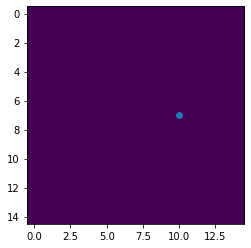

In [0]:
plt.imshow(image_15x15)
plt.scatter(10,7)

In [0]:
x = 300/15

In [0]:
x

20.0

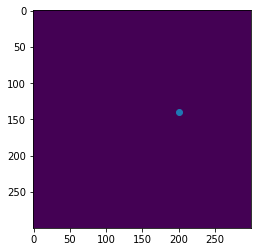

In [0]:
plt.imshow(image_300x300)
plt.scatter(10*20, 7*20)

### Converting a bounding box in 300x300 to scale it down to 15x15
- You can do the same kind of shrinkage and make the bounding box fit correctly regardless of the image shape and size

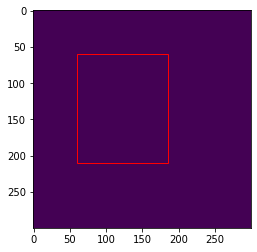

In [0]:
from matplotlib import patches
fig,ax = plt.subplots()
ax.imshow(image_300x300)
x,y,width,height = 60,60,125,150

patch = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(patch)

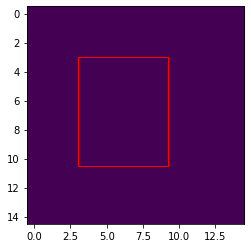

In [0]:
scale = 300/15
fig,ax = plt.subplots()
ax.imshow(image_15x15)
x,y,width,height = 60,60,125,150

patch = patches.Rectangle((x/scale,y/scale),width/scale,height/scale,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(patch)

### Handling different iamges of diffrents sizes
- Lets say you have two images of different sizes and also accordingly different bounding boxes of different sizes and scales. But your network handles inputs only of size 300 x 300. How will you scale these two images and their bounding boxes to match the 300 x 300 input size requirement. You have to make sure that even if you reshape the image the boundig box should still be over the object and does not change its position w.r.t the image

In [0]:
!wget -O "dog.jpg" 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTin5lTsQzYM-dklfQVQRPK5WdOQIY28XFnpdZ9x_T6gYs41Sgh'
!wget -O "cat.jpg" 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS6mAsnhiiYGKiPA__5hPMfqQs7SnEXescQdpiBLJFryh9dYOXb'

--2019-12-19 11:50:48--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTin5lTsQzYM-dklfQVQRPK5WdOQIY28XFnpdZ9x_T6gYs41Sgh
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.119.138, 108.177.119.100, 108.177.119.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.119.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15980 (16K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  15.61K  --.-KB/s    in 0s      

2019-12-19 11:50:48 (117 MB/s) - ‘dog.jpg’ saved [15980/15980]

--2019-12-19 11:51:03--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS6mAsnhiiYGKiPA__5hPMfqQs7SnEXescQdpiBLJFryh9dYOXb
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.119.138, 108.177.119.100, 108.177.119.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.119.138|:443... connected.
HTTP request sent, awaiting res

In [0]:
from PIL import Image
dog_image = cv2.imread('dog.jpg')
cat_image = cv2.imread('cat.jpg')

In [0]:
print(f"Dog: {dog_image.shape}")
print(f"Cat: {cat_image.shape}")

Dog: (452, 678, 3)
Cat: (480, 640, 3)


In [0]:
x_dog, y_dog, height_dog, width_dog = 40,40,350,270
x_cat, y_cat, height_cat, width_cat = 150,150,120,200

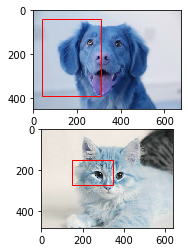

In [0]:
from matplotlib import patches
bbox1 = patches.Rectangle((x_dog, y_dog),width_dog, height_dog, linewidth=1,edgecolor='r', facecolor='none')
bbox2 = patches.Rectangle((x_cat, y_cat),width_cat, height_cat, linewidth=1,edgecolor='r', facecolor='none')

fig,ax = plt.subplots(2,1)
ax[0].imshow(dog_image)
ax[0].add_patch(bbox1)

ax[1].imshow(cat_image)
ax[1].add_patch(bbox2)

- As you can see above that both the images are of different sizes and I've draw two different bounding boxes on them.

- Now we will resize the image to 300x300 and at the same time scale the bounding box to match the new size of the image

- Now calculate the shrinkage value but this time you have to calculate the shrinkage value w.r.t to both width and height, since both width and height are of different sizes.

- After calculating the shrinkage value, scale the bounding boxes according to the shrinkage value and then resize the images to 300x300 and plot the bounding boxes on them to verify if their position remains the same.

- You have to be careful while plotting images as matplotlib takes the zero'th axis (image.shape[0]) as the height of the image and the first axis(image.shape[1]) as the width of the image


In [0]:
shrink_width_dog = (dog_image.shape[1]/300)
shrink_height_dog =(dog_image.shape[0]/300)

shrink_width_cat = (cat_image.shape[1]/300)
shrink_height_cat = (cat_image.shape[0]/300)

In [0]:
new_bbox1 = patches.Rectangle((x_dog/shrink_width_dog, y_dog/shrink_height_dog),
                               width_dog/shrink_width_dog, height_dog/shrink_height_dog,
                               linewidth=1, edgecolor='r',facecolor='none')

new_bbox2 = patches.Rectangle((x_cat/shrink_width_cat, y_cat/shrink_height_cat),
                               width_cat/shrink_width_cat, height_cat/shrink_height_cat,
                               linewidth=1, edgecolor='r',facecolor='none')

new_dog_image = cv2.resize(dog_image,(300,300))
new_cat_image = cv2.resize(cat_image,(300,300))

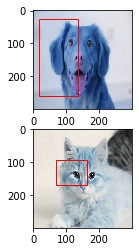

In [0]:
fig,ax = plt.subplots(2,1)
ax[0].imshow(new_dog_image)
ax[0].add_patch(new_bbox1)

ax[1].imshow(new_cat_image)
ax[1].add_patch(new_bbox2)

### In come Anchor Boxes

- Anchor Boxes first appeared in RCNN and then used with CNNs in SSD and the finally added to the YOLOv2.

- It is hard to explain the use case of Anchor boxes using words alone so lets start with drawing them first.

- First plot the dog image again and then divide into a 5x5 boxes. 

- Now there are anchor of different max and min width and height. An anchor box with a given width and height will assume the size of the object.

- Say you have an anchor box of min height and 

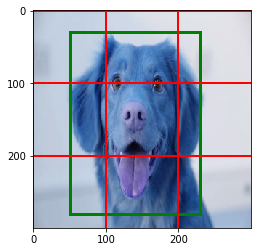

In [0]:
fig, ax = plt.subplots()
ax.imshow(new_dog_image)
ax.set_xticks([0,100,200])
ax.set_yticks([0,100,200])

ax.yaxis.grid(True, which="major", linewidth=2, color='red')
ax.xaxis.grid(True, which="major", linewidth=2, color='red')


anchor_box = [50,30,180,250]
bbox = patches.Rectangle((anchor_box[0], anchor_box[1]),anchor_box[2], anchor_box[3],
                         linewidth=3, facecolor='none', edgecolor='green')

ax.add_patch(bbox)

##### I Have drawn a grid of 3x3 on the dog image and plotted a rough approximated bounding box around it. Now note that the center of the bounding box lies in the center box in the grid.

##### Assume that you already know that the size of most of the objects will be around 150x200, so your bounding boxes will also be around the 150x200 range. So instead of directly regressing the value of the bounding box. You find the offset value from 150x200.

##### For example an object in your image is of size 178, 220. So your network will not directly regress the value 178 and 220, but will find the offset of 178, 220 from the assumed size 150,200. The network will output: 28, 20. 

##### This assumed box 150,220 is called an <b>Anchor box</b>. It basically is a template box that you give to your network. You place this anchor box around many positions in the image and find the one which is able to capture the image offsets properly.

#### Lets draw anchor boxes for our dog image in all grids

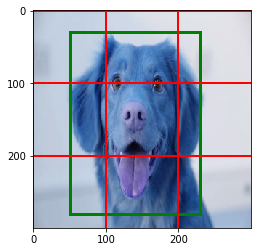

In [0]:
fig, ax = plt.subplots()
ax.imshow(new_dog_image)
ax.set_xticks([0,100,200])
ax.set_yticks([0,100,200])

ax.yaxis.grid(True, which="major", linewidth=2, color='red')
ax.xaxis.grid(True, which="major", linewidth=2, color='red')


bounding_box = [50,30,180,250]
bbox = patches.Rectangle((bounding_box[0], bounding_box[1]),bounding_box[2], bounding_box[3],
                         linewidth=3, facecolor='none', edgecolor='green')

ax.add_patch(bbox)

# Plotting anchor boxes


In [0]:
def plot_grid(image, grid):
    '''
        - This plots the image and divides it into the given grid.
        - The height and width of the image must be same
    '''
    grid_ratio = int(image.shape[0]/grid)
    ticks = [i*grid_ratio for i in range(grid)]

    fig,ax = plt.subplots()
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    ax.yaxis.grid(True, which="major", linewidth=2, color='red')
    ax.xaxis.grid(True, which="major", linewidth=2, color='red')
    ax = ax.imshow(image) 

    return ax

In [0]:
def plot_bbox(image, center_x, center_y, width,height, ax=None):
    """
        Plots a bounding box on the image
    """
    if ax == None:
        fig,ax = plt.subplots()
        ax.imshow(image)

    x = center_x - width/2
    y = center_y - height/2

    patch = patches.Rectangle((x,y),width, height, linewidth=2, edgecolor='green', facecolor="none")

    ax = ax.add_patch(patch)
    return ax

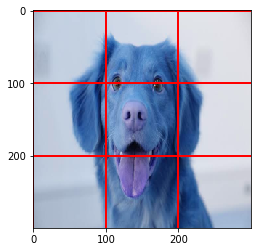

In [0]:
ax = plot_grid(new_dog_image, 3)

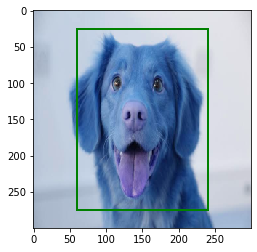

In [0]:
plot_bbox(new_dog_image, 150, 150, 180, 250)

### Generating Anchor Boxes
- We will split the image of 300x300 into with grid_size of 3 and find the centers for each of them

- And with those we will generate 3 bounding boxes of height and width with aspect ratio(height/width) of [1, 1/2, 2]


In [0]:
def get_centers(grid_size, image_shape,
                offset=0.5):
    """
        - Given grid sizes and image shape, this function returns different center points for each grid box
    """

    # Find the distances between each of the center points in both x and y axis
    x_width = image_shape[0]/grid_size[0] 
    y_height = image_shape[1]/grid_size[1] 

    # Find the center points of both x and y axis
    cx = np.linspace(offset*x_width, (offset+grid_size[0]-1)*x_width, grid_size[0])
    cy = np.linspace(offset*y_height, (offset+grid_size[0]-1)*y_height, grid_size[1])

    return cx, cy    

In [0]:
cx,cy = get_centers((3,3),(300,300,3)) 

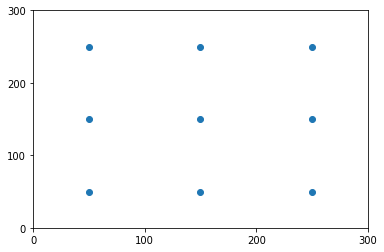

In [0]:
cx_grid,cy_grid = np.meshgrid(cx,cy)
fig, ax = plt.subplots()
ax.scatter(cx_grid,cy_grid)
ax.set_xticks([0,100,200,300])
ax.set_yticks([0,100,200,300])

In [0]:
def generate_anchor_box(image_shape, 
               cx, cy, aspect_ratio,
               scale_of_bbox):
    """
        - This functions returns n bbox's for each fo the grid and along with their width height start_x, start_y

        - scale_of_bbox refers to the size of bounding box w.r.t the image_shape. It should be either a
        single value or a list of tuple
    """
    if isinstance(scale_of_bbox,(list,tuple)) and len(scale_of_bbox) == 2:
        width = image_shape[0]*scale_of_bbox[0]
        height = image_shape[1]*scale_of_bbox[1]
    else:
        width = height = image_shape[0]*scale_of_bbox

    bboxes_per_grid = []
    for ar in aspect_ratio:
        bbox_width = width*ar
        bbox_height = width/ar
        bboxes_per_grid.append((bbox_width, bbox_height))
    
    """
        Convert our bboxes into x,y,height,width for each of the given centers
    """
    import itertools
    all_bboxes = []
    for grid_center_x,grid_center_y in itertools.product(cx,cy):
        this_grid_bboxes = [] # Bounding boxes for this grid
        for bbox_width, bbox_height in bboxes_per_grid:
            # Get the starting x and y coordinates for the bbox
            bbox_x = grid_center_x - bbox_width/2
            bbox_y = grid_center_y - bbox_height/2
            bbox_tensor = np.array([bbox_x, bbox_y, bbox_width, bbox_height])
            this_grid_bboxes.append(bbox_tensor)
        all_bboxes.append(np.array(this_grid_bboxes))

    return np.array(all_bboxes)


In [0]:
anchor_boxes = generate_anchor_box((300,300,3),cx,cy,[1.5,1/1.5,1],0.35)

In [0]:
anchor_boxes.shape

(9, 3, 4)

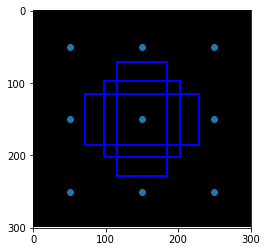

In [0]:
abox = anchor_boxes[4] # Take the center one
fig, ax = plt.subplots()
ax.imshow(np.zeros(shape=(300,300,3)))
ax.scatter(cx_grid,cy_grid)
ax.set_xticks([0,100,200,300])
ax.set_yticks([0,100,200,300])
for ab  in abox:
    patch = patches.Rectangle((ab[0],ab[1]),ab[2],ab[3],linewidth=2,edgecolor='blue',facecolor='none')
    cx_grid,cy_grid = np.meshgrid(cx,cy)
    ax.add_patch(patch)


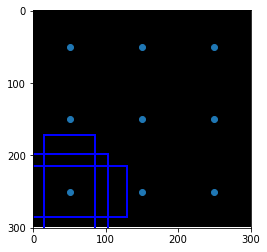

In [0]:
abox = anchor_boxes[2] 
fig, ax = plt.subplots()
ax.imshow(np.zeros(shape=(300,300,3)))
ax.scatter(cx_grid,cy_grid)
ax.set_xticks([0,100,200,300])
ax.set_yticks([0,100,200,300])
for ab  in abox:
    patch = patches.Rectangle((ab[0],ab[1]),ab[2],ab[3],linewidth=2,edgecolor='blue',facecolor='none')
    cx_grid,cy_grid = np.meshgrid(cx,cy)
    ax.add_patch(patch)

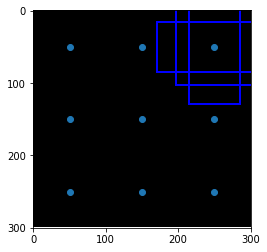

In [0]:
abox = anchor_boxes[6] 
fig, ax = plt.subplots()
ax.imshow(np.zeros(shape=(300,300,3)))
ax.scatter(cx_grid,cy_grid)
ax.set_xticks([0,100,200,300])
ax.set_yticks([0,100,200,300])
for ab  in abox:
    patch = patches.Rectangle((ab[0],ab[1]),ab[2],ab[3],linewidth=2,edgecolor='blue',facecolor='none')
    cx_grid,cy_grid = np.meshgrid(cx,cy)
    ax.add_patch(patch)

### Review till now
- As you can see we have generate 3 bounding boxes per grid cell for 9 different grid cells. So in total we have 27 bounding boxes

- Now what we have to find is which one of these 27 bounding boxes will match best with the bouding box we drew for the dog

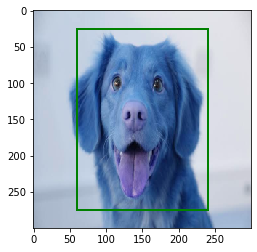

In [0]:
plot_bbox(new_dog_image, 150, 150, 180, 250)

In [0]:
def intersection_over_union()